##Simulating sky images, with source noise
###Simpliest as possible
####Written by Sergio Hernandez Charpak
####13/06/2016

In [1]:
%pylab inline
import numpy as np
import matplotlib.pyplot as plt
from pylab import *
import cv2

Populating the interactive namespace from numpy and matplotlib


In [2]:
path_images = './Images/withNoise/'
sigma_noise_background = 50

<p>We want to simulate:</p>
<ul>
<li>Sky Flux</li>
<li>Delta sources</li>
<li>Background noise</li>
<li>Source noise</li>
</ul>
Our two outputs are going to be pairs of New/Reference:
<ul>
<li>Sky substracted Image</li>
<li>Image with the background</li>
</ul>

###Theory Images

In [3]:
width = 255
height = 255
#Black image
black_image = np.zeros((height,width), np.uint8)
cv2.imwrite(path_images+'blackImage.jpg', black_image)

True

In [4]:
#Sky flux
sky_flux = 20
sky_image = black_image + sky_flux
cv2.imwrite(path_images+'skyImage.jpg', sky_image)

True

In [5]:
#Reference Image
reference = sky_image.copy()
#New Image
new_image = sky_image.copy()

In [6]:
#Some delta sources
cv2.circle(reference, (width/2,height/2), 1, (255, 255, 255), -1) 
cv2.circle(reference, (width/3, height/4), 1, (180, 180, 180), -1)
cv2.ellipse(reference,(int(width*0.8), int(height*0.4)),(20,40),30,0,360,180,-1)

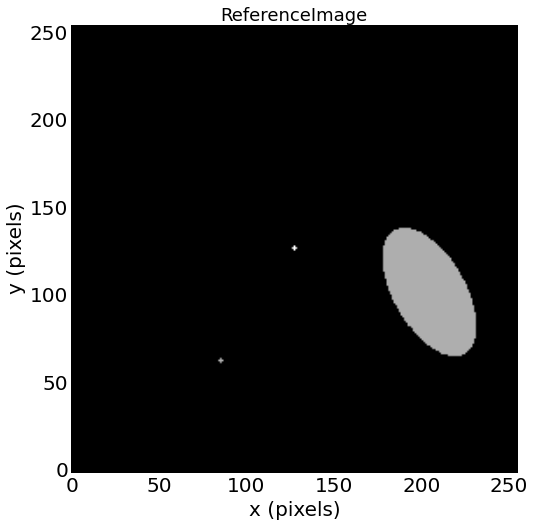

In [7]:
fig = plt.figure(figsize = (8,8))
plt.imshow(reference, cmap = 'gray', origin='lower')
plt.title('ReferenceImage', fontsize=18)
plt.xlabel("x (pixels) ", fontsize=20)
plt.ylabel("y (pixels) ", fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=20)

In [8]:
#Some delta sources
cv2.circle(new_image, (width/2,height/2), 1, (255, 255, 255), -1) 
cv2.circle(new_image, (width/3, height/4), 1, (180, 180, 180), -1)
cv2.ellipse(new_image,(int(width*0.8), int(height*0.4)),(20,40),30,0,360,180,-1)
cv2.circle(new_image, (64, 180), 1, (255, 255, 255), -1) # an asteroid !!
cv2.circle(new_image, (210, 120), 1, (255, 255, 255), -1) # a supernova !!! 

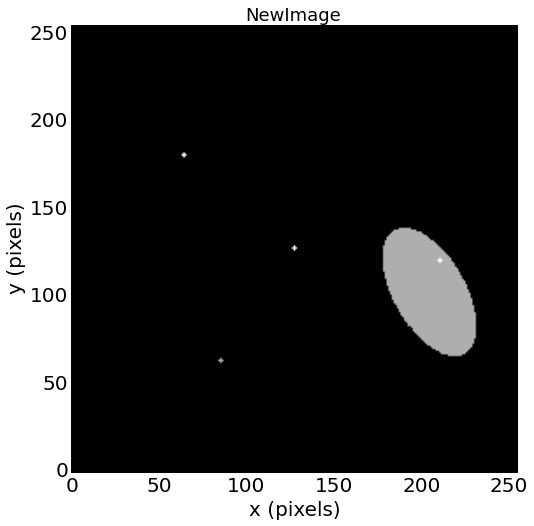

In [9]:
fig = plt.figure(figsize = (8,8))
plt.imshow(new_image, cmap = 'gray', origin='lower')
plt.title('NewImage', fontsize=18)
plt.xlabel("x (pixels) ", fontsize=20)
plt.ylabel("y (pixels) ", fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=20)

In [10]:
#These are the theory images
cv2.imwrite(path_images+'truesky_ref.jpg', reference)
cv2.imwrite(path_images+'truesky_new.jpg', new_image)

True

###Measured Images

In [11]:
#The background noise is no longer calculated from one point.
#It is calculated locally for each pixel value.
row, col = sky_image.shape
mean = 0
for i in range(row):
    for j in range(col):
        noise_ref = np.random.normal(mean, np.sqrt(reference[i,j]), (1))
        noise_new = np.random.normal(mean, np.sqrt(new_image[i,j]), (1))
        reference[i,j] = reference[i,j] + noise_ref
        new_image[i,j] = new_image[i,j] + noise_new
print np.mean(np.sqrt(reference)), np.mean(np.sqrt(new_image))

4.74695 4.75065


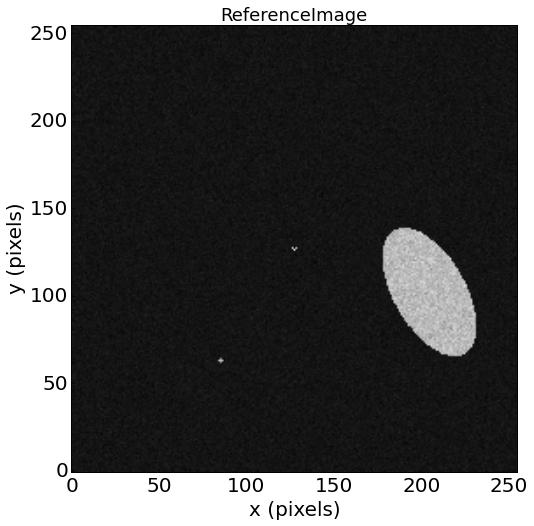

In [12]:
fig = plt.figure(figsize = (8,8))
plt.imshow(reference, cmap = 'gray', origin='lower')
plt.title('ReferenceImage', fontsize=18)
plt.xlabel("x (pixels) ", fontsize=20)
plt.ylabel("y (pixels) ", fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=20)

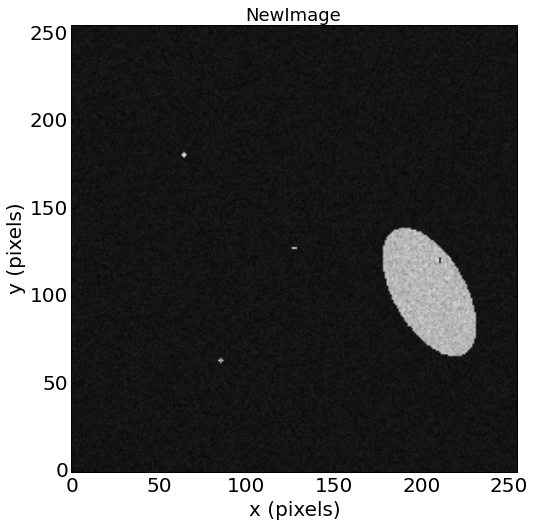

In [13]:
fig = plt.figure(figsize = (8,8))
plt.imshow(new_image, cmap = 'gray', origin='lower')
plt.title('NewImage', fontsize=18)
plt.xlabel("x (pixels) ", fontsize=20)
plt.ylabel("y (pixels) ", fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=20)

In [14]:
#These are the measured images with background
cv2.imwrite(path_images+'NewImage_b.jpg', new_image)
cv2.imwrite(path_images+'ReferenceImage_b.jpg', reference)

True

In [15]:
#We substract the sky to get the final results
reference = reference - sky_image.copy()
new_image = new_image - sky_image.copy()

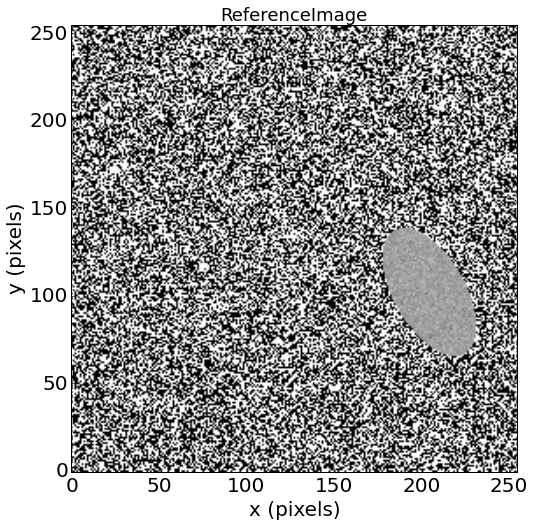

In [16]:
fig = plt.figure(figsize = (8,8))
plt.imshow(reference, cmap = 'gray', origin='lower')
plt.title('ReferenceImage', fontsize=18)
plt.xlabel("x (pixels) ", fontsize=20)
plt.ylabel("y (pixels) ", fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=20)

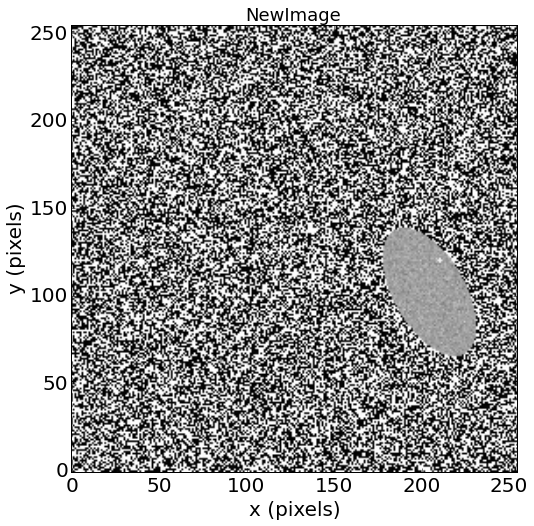

In [17]:
fig = plt.figure(figsize = (8,8))
plt.imshow(new_image, cmap = 'gray', origin='lower')
plt.title('NewImage', fontsize=18)
plt.xlabel("x (pixels) ", fontsize=20)
plt.ylabel("y (pixels) ", fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=20)

In [18]:
cv2.imwrite(path_images+'NewImage.jpg', new_image)
cv2.imwrite(path_images+'ReferenceImage.jpg', reference)

True